In [1]:
import requests
import bs4
import time
import random

In [22]:
my_headers={"referer": "https://www.coupang.com/np/categories/195142",
     "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
}

In [23]:
total_data_list=[]
for page_number in range (1,28):
    url="https://www.coupang.com/np/categories/195142?page={}".format(page_number)
    res = requests.get(url=url, headers=my_headers)
    
    soup=bs4.BeautifulSoup(res.text)
    
    div_elements =soup.select("dd.descriptions > div.name")
    for e in div_elements:
        div_elements = e
        data_list=[]
        data_list.append(div_elements.text.strip())
        total_data_list.append(data_list)
    time.sleep(1)

In [7]:
total_data_list

[['동서 맥심 화이트골드 커피믹스, 160개입, 1개'],
 ['맥심 모카골드 마일드 커피믹스 12g x 320p + 화이트골드 커피믹스 11.7g x 20p, 340개입, 1세트'],
 ['[펄세스] 마일드 스테비아 커피믹스 30개입'],
 ['남양 프렌치카페 카페믹스, 100개입, 1개'],
 ['프렌치카페 카페믹스, 10.9g, 330개'],
 ['곰곰 콜롬비아 블렌드 원두커피, 홀빈(분쇄안함), 1000g'],
 ['G7 블랙 퓨어블랙 인스턴트커피, 2g, 100개'],
 ['남양 프렌치카페 카페믹스, 330개입, 1개'],
 ['맥심 모카골드 마일드 커피믹스 선물세트, 400개입, 1박스'],
 ['G7 퓨어 블랙 커피 수출용, 2g, 200개'],
 ['맥심 화이트 골드 커피믹스, 160개, 1개'],
 ['맥심 모카골드 마일드 커피 믹스, 160개입, 1박스'],
 ['티젠 피치 콤부차, 5g, 30개'],
 ['맥심 카누 다크 로스트 아메리카노, 1.6g, 60개'],
 ['동서 맥심 화이트골드 커피믹스, 180개입, 2개'],
 ['스타벅스 하우스블렌드 캡슐커피, 8.5g, 12개'],
 ['담터 호두 아몬드 율무차 스틱형, 18.5g, 150개'],
 ['프렌치카페 카페믹스, 210개입, 1개'],
 ['티젠 콤부차 레몬, 5g, 30개'],
 ['이디야 비니스트 오리지널 아메리카노 원두커피믹스, 1개, 150개입'],
 ['티트리트 여우티 팥호박차, 1.5g, 20개'],
 ['웅진 유기농 하늘보리차, 보리차, 24개'],
 ['일리 네스프레소 호환 캡슐커피 인텐소 10개입, 57g, 1개'],
 ['티젠 콤부차 레몬, 5g, 60개'],
 ['일리 네스프레소 호환 캡슐커피 포르테, 57g, 10개'],
 ['일리 다크로스트 캡슐커피, 140.7g, 1통'],
 ['쟈뎅 로얄 헤이즐넛 콜롬비아 수프리모 커피, 100개입, 1개'],
 ['일리 디카페인(디카프) 캡슐 21개입, 140.7g, 1개'],
 ['일리 네스프레소 호환 캡슐커피 클

In [8]:
import pandas as pd
df=pd.DataFrame(total_data_list)

In [9]:
df.to_csv('wordtext8.txt',index=False)

In [10]:
from konlpy.tag import Twitter 
from collections import Counter

In [11]:
file = open('wordtext8.txt', 'r', encoding="UTF-8")

lists = file.readlines()

file.close()

#lists

In [12]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

C:\Users\win10\anaconda3\envs\javaEdu\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('0', 'Number'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('동서', 'Noun'), ('맥심', 'Noun'), ('화이트골드', 'Noun'), ('커피믹스', 'Noun'), (',', 'Punctuation'), ('160', 'Number'), ('개입', 'Noun'), (',', 'Punctuation'), ('1', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('맥심', 'Noun'), ('모카', 'Noun'), ('골드', 'Noun'), ('마', 'Noun'), ('일드', 'Noun'), ('커피믹스', 'Noun'), ('12', 'Number'), ('g', 'Alpha'), ('x', 'Alpha'), ('320', 'Number'), ('p', 'Alpha'), ('+', 'Punctuation'), ('화이트골드', 'Noun'), ('커피믹스', 'Noun'), ('11.7', 'Number'), ('g', 'Alpha'), ('x', 'Alpha'), ('20', 'Number'), ('p', 'Alpha'), (',', 'Punctuation'), ('340', 'Number'), ('개입', 'Noun'), (',', 'Punctuation'), ('1', 'Number'), ('세트', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('[', 'Punctuation'), ('펄세스', 'Noun'), (']', 'Punctuation'), ('마', 'Noun'), ('일드', 'Noun'), ('스테비', 'Noun'), ('아', 'Josa'), ('커피믹스', 'Noun'), ('30', 'Number'), ('개입', 'Noun'), ('\n', 'Foreign')], [('"', 'Punctua

In [13]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and("믹스" not in word)and("인분" not in word)and ("입" not in word)and("세트" not in word)and("팩" not in word)and("산" not in word)and("것" not in word)and("냉동" not in word)and("개" not in word)and("냉장" not in word)and("용" not in word)and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['동서', '맥심', '화이트골드', '맥심', '모카', '골드', '마', '일드', '화이트골드', '펄세스', '마', '일드', '스테비', '남양', '프렌치', '카페', '카페', '프렌치', '카페', '카페', '콜롬비아', '블렌드', '원두', '커피', '홀빈', '분쇄', '안함', '블랙', '퓨어', '블랙', '인스턴트', '커피', '남양', '프렌치', '카페', '카페', '맥심', '모카', '골드', '마', '일드', '선물', '박스', '퓨어', '블랙', '커피', '맥심', '화이트', '골드', '맥심', '모카', '골드', '마', '일드', '커피', '박스', '티젠', '피치', '콤', '부차', '맥심', '카누', '다크', '로스트', '아메리카노', '동서', '맥심', '화이트골드', '스타벅스', '하우스', '블렌드', '캡슐', '커피', '담터', '호두', '아몬드', '율무', '차', '스틱', '프렌치', '카페', '카페', '티젠', '콤', '부차', '레몬', '이디야', '비니', '스트', '리지', '널', '아메리카노', '원두', '티', '트리', '트', '여우', '티', '팥', '호박', '차', '웅진', '유기농', '하늘', '보리차', '보리차', '일리', '네스프레소', '호환', '캡슐', '커피', '티젠', '콤', '부차', '레몬', '일리', '네스프레소', '호환', '캡슐', '커피', '포르테', '일리', '다크', '로스트', '캡슐', '커피', '통', '쟈뎅', '로얄', '헤이즐넛', '콜롬비아', '리모', '커피', '일리', '디카', '페인', '디', '카프', '캡슐', '일리', '네스프레소', '호환', '캡슐', '커피', '클라시코', '티젠', '제주', '녹차', '카누', '미니', '디카', '페인', '아메리카노', '카누', '라떼', '바닐라', '담터', '쌍', '화차', '플러스

In [14]:
count = Counter(noun_adj_adv_list)

In [15]:
words = dict(count.most_common())

In [16]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [17]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = 'C:/Users/win10/workspace/font/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


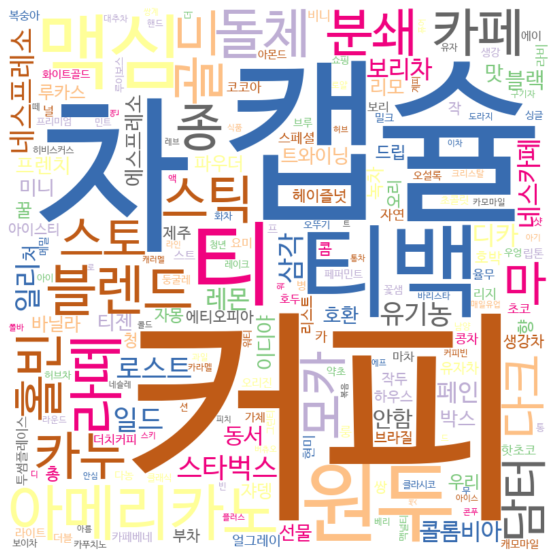

In [19]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')